# Black Brant VC Flight 21.006 GT

Generate our own data and compare it with that from page 5 of https://arc.aiaa.org/doi/pdf/10.2514/3.62081

Notes:
- I assumed a fixed wall temperature of 300 K, I'm not sure what they used for the original data.


- Thermocouple 1 on the rocket is just in front of Station 6
- Thermocouple 9 on the rocket is just in front of Station 10
- The heat transfer data I took from them is from thermocouple 9.


### Get the flight conditions from the NASA document
- I used http://www.graphreader.com/ to convert the graphs in the NASA document into actual data that we can use.
- The data in the dictionaries below is all in metric SI.

In [1]:
#x values are time, y values are the corresponding data
velocity_data = {"x":[9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,40.5,41,41.5,42,42.5,43,43.5,44,44.5,45,45.5,46,46.5,47,47.5,48,48.5,49,49.5,50,50.5,51,51.5,52,52.5,53,53.5,54,54.5,55,55.5,56,56.5,57,57.5,58,58.5,59,59.5,60,60.5,61,61.5,62,62.5,63,63.5,64,64.5,65,65.5,66,66.5,67,67.5,68,68.5,69,69.5,70],
                 "y":[347.063,371.697,396.369,421.041,445.713,470.385,495.057,519.729,544.401,569.073,596.014,626.072,656.131,686.189,716.248,746.306,776.364,807.157,842.331,877.504,912.677,947.85,983.023,1018.196,1053.369,1088.624,1124.622,1160.619,1196.616,1232.613,1280.836,1330.625,1380.414,1430.203,1479.992,1528.728,1577.356,1625.984,1674.612,1723.239,1771.867,1820.495,1869.123,1917.751,1966.378,2015.006,2017.148,2018.84,2020.532,2018.605,2013.632,2008.659,2003.686,1998.713,1993.74,1988.767,1983.794,1978.821,1973.857,1968.936,1964.016,1959.096,1954.175,1949.255,1944.335,1939.414,1934.494,1929.574,1924.653,1919.733,1914.813,1909.731,1904.583,1899.435,1894.287,1889.139,1883.99,1878.842,1873.694,1868.546,1863.398,1858.25,1853.102,1847.954,1842.952,1839.105,1835.257,1831.41,1827.562,1823.715,1819.867,1816.02,1812.172,1808.325,1804.477,1800.63,1796.782,1792.935,1789.088,1785.24,1781.393,1777.545,1773.698,1769.887,1766.08,1762.272,1758.465,1754.657,1750.85,1747.043,1743.235,1739.428,1735.62,1731.813,1728.006,1724.198,1720.391,1716.583,1712.776,1708.969,1705.161,1701.354,1697.546]}
altitude_data = {"x":[9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,40.5,41,41.5,42,42.5,43,43.5,44,44.5,45,45.5,46,46.5,47,47.5,48,48.5,49,49.5,50,50.5,51,51.5,52,52.5,53,53.5,54,54.5,55,55.5,56,56.5,57,57.5,58,58.5,59,59.5,60,60.5,61,61.5,62,62.5,63,63.5,64,64.5,65,65.5,66,66.5,67,67.5,68,68.5,69,69.5,70],
                 "y":[1284.393,1421.773,1590.407,1846.484,2102.561,2358.637,2614.714,2870.79,3104.909,3295.735,3486.561,3677.387,3868.214,4059.04,4294.836,4701.932,5109.029,5516.125,5923.221,6330.317,6773.776,7259.516,7745.256,8230.995,8716.735,9202.475,9688.215,10173.954,10667.612,11375.959,12084.306,12792.653,13501.001,14209.348,14917.695,15626.042,16334.39,17042.737,17826.467,18698.815,19571.164,20443.513,21315.862,22190.277,23083.903,23977.529,24871.154,25764.78,26658.406,27552.031,28445.657,29355.434,30315.017,31274.601,32234.185,33193.769,34153.352,35112.936,36073.701,37035.466,37997.231,38958.995,39920.76,40882.524,41844.289,42806.054,43753.088,44698.133,45643.177,46588.222,47533.266,48478.311,49423.356,50368.4,51259.606,52140.342,53021.079,53901.816,54782.553,55663.29,56544.027,57424.763,58305.5,59186.237,60069.388,60952.873,61836.358,62719.843,63603.328,64486.814,65370.299,66253.784,67137.269,68026.548,68916.639,69806.731,70696.822,71586.914,72477.005,73367.097,74257.188,75147.28,76037.371,76927.463,77781.083,78607.997,79434.911,80261.825,81088.739,81915.653,82742.567,83569.481,84396.395,85223.309,86050.223,86877.137,87704.051,88530.965,89357.879,90184.793,91011.707,91838.621,92741.065]}


### Specify the nosecone and create the HeatTransfer analysis object

Nosecone dimensions from the NASA report: xprime = 71.3 inches = 1.81102 m , yprime = 0.72 ft = 0.219456 m

In [2]:
import torch

tangent_ogive = torch.TangentOgive(xprime = 1.81102, yprime = 0.219456)

time_data = velocity_data["x"]        #Could also use altitude_data["x"] - both are the same

analysis = torch.AeroHeatingAnalysis(tangent_ogive, 
                                     time_data, 
                                     altitude_data["y"], 
                                     velocity_data["y"],
                                     fixed_wall_temperature = True,
                                     starting_temperature = 300) 
analysis.run()

'''Can output data to a .json file if we want'''
#analysis.to_json("Black Brant VC Flight 21.006 GT.json")
#analysis.from_json("Black Brant VC Flight 21.006 GT.json")


0.0% complete, i = 0


D:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
D:\anaconda3\lib\site-packages\thermo\viscosity.py:826: RuntimeWarning: invalid value encountered in double_scalars
  D = 0.3257/((1.0039-Tr**2.573)**0.2906) - 0.2086
D:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


10.0% complete, i = 12
20.0% complete, i = 24
30.0% complete, i = 36
40.0% complete, i = 48
50.0% complete, i = 60
60.0% complete, i = 72
70.0% complete, i = 84
80.0% complete, i = 96
90.0% complete, i = 108
100.0% complete, i = 120


'Can output data to a .json file if we want'

### Plot graphs

Get the data NASA generated using the FORTRAN program, so we can compare it to the data our Python program generated.

In [3]:
rex_data = {"x":[11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,40.5,41,41.5,42,42.5,43,43.5,44],
            "y":[22170096.084,22914656.053,23528407.832,24479874.23,25218640.128,25894102.383,26763729.289,27164572.168,27846029.004,28403482.576,28544581.027,28721940.178,28900401.333,28972095.889,28972095.889,28890091.941,28686380.406,28591863.889,28403482.576,27846029.004,27299516.15,26499792.158,25723495.632,24479874.23,23296376.624,22170096.084,20890200.64,19880248.456,18919123.156,17885839.353,16965053.624,15828002.563,14914240.697,14193200.711,13241927.919,12539445.601,11815534.472,11078381.768,10438818.895,9934146.483,9154217.648,7398692.023,5794076.408,4320968.116,3383843.975,2649987.97,2075263.132,1898172.707,1736194.109,1588037.787,1466991.328,1341807.146,1227305.426,1100542.673,957962.783,825631.448,711580.136,606093.26,521132.73,448086.18,385278.477,331274.455,284840.112,244914.415,210585.055,180215.427,153136.568]}
qlam_data = {"x":[8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,40.5,41,41.5,42,42.5,43,43.5,44,44.5,45,45.5,46,46.5,47,47.5,48,48.5,49,49.5,50],
             "y":[723.895,1139.516,1555.136,1970.757,2386.378,2801.999,3217.62,3532.778,3824.685,4116.593,4408.5,4807.189,5459.927,6112.665,6765.403,7418.14,8006.581,8549.116,9091.651,9634.186,10176.722,10719.257,11242.647,11600.721,11958.794,12316.867,12674.941,13047.11,13477.486,13907.863,14338.239,14768.616,15201.719,15662.475,16123.231,16583.987,16797.333,16928.977,17060.622,17170.869,17250.796,17330.723,16836.789,16053.504,15672.376,15462.568,15252.759,14668.355,13789.158,12909.96,12233.242,11603.816,10974.391,10247.791,9473.113,9049.135,8791.278,8316.56,7841.842,7367.123,6892.405,6417.686,6000.403,5656.102,5311.8,4967.499,4623.198,4278.897,3934.595,3590.294,3380.719,3208.569,3036.418,2864.268,2692.117,2519.966,2347.816,2164.073,1899.051,1634.03,1369.009,1103.987,838.966,573.944,308.923]}
qturb_data = {"x":[7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5,37,37.5,38,38.5,39,39.5,40,40.5,41,41.5,42,42.5,43,43.5,44,44.5,45,45.5,46,46.5,47,47.5,48,48.5,49,49.5,50,50.5,51,51.5,52,52.5,53,53.5,54,54.5,55,55.5,56,56.5,57],
              "y":[2011.025,6959.864,11908.703,16857.542,21806.381,26755.219,31946.258,37527.655,43109.052,48690.45,54271.847,59853.244,65736.259,72336.868,78937.477,85538.086,92138.695,99772.524,107698.108,115623.692,123549.276,131284.482,138986.81,146689.138,154391.466,159028.331,163419.03,167809.729,171010.662,174187.765,177199.576,179521.588,180434.907,181223.303,180744.898,180266.492,179047.582,176396.418,172895.502,169140.744,164271.557,158690.16,153108.762,147527.365,141945.968,132344.086,118395.447,105831.849,96752.777,87673.704,78757.324,70478.251,62199.179,56638.787,51569.018,46499.249,41429.48,36503.747,32503.745,28503.744,25981.747,23880.515,21779.283,19901.131,18306.446,16711.761,15117.076,13522.391,11927.706,11099.544,10318.148,9536.753,8755.357,7973.961,7197.715,6515.544,5833.373,5151.203,4617.083,4220.984,3824.885,3428.785,3032.686,2636.587,2322.499,2116.869,1911.238,1705.608,1499.977,1294.347,1088.716,883.086,825.225,772.069,718.913,665.757,657.556,657.556,657.556,657.556]}


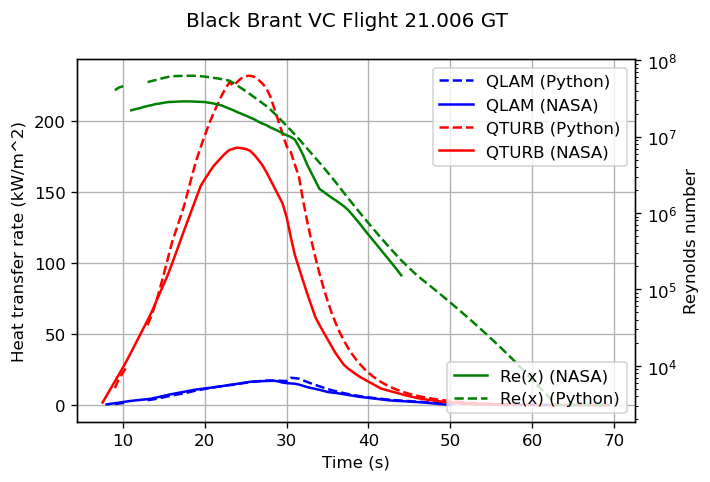

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

#Plot the heat transfer rates we generated against the data provided by NASA
fig, ax1 = plt.subplots()
fig.suptitle("Black Brant VC Flight 21.006 GT")

#Plot heat transfer rates
ax1.plot(time_data, analysis.q_lam[10, :]/1000, label="QLAM (Python)", color="blue", linestyle="--")
ax1.plot(qlam_data["x"], np.array(qlam_data["y"])/1000, label="QLAM (NASA)", color="blue")
ax1.plot(time_data, analysis.q_turb[10, :]/1000, label="QTURB (Python)", color="red", linestyle='--')
ax1.plot(qturb_data["x"], np.array(qturb_data["y"])/1000, label="QTURB (NASA)", color="red")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Heat transfer rate (kW/m^2)")
ax1.grid()
ax1.legend()

#Plot local Reynolds number using a different y-scale
ax2 = ax1.twinx()       #Second axes that shares the same x-axis as ax1
ax2.set_yscale("log")   #Make the scale logorithmic
ax2.plot(rex_data["x"], rex_data["y"], label="Re(x) (NASA)", color="green")
ax2.plot(time_data, analysis.Rex[10, :], label="Re(x) (Python)", color="green", linestyle='--')
ax2.set_ylabel("Reynolds number")
ax2.legend(loc = 'lower right')

plt.show()